In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [3]:
digits_data = load_digits()

df = pd.DataFrame(data=digits_data.data,
                  columns=digits_data.feature_names)
df['digit'] = digits_data.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


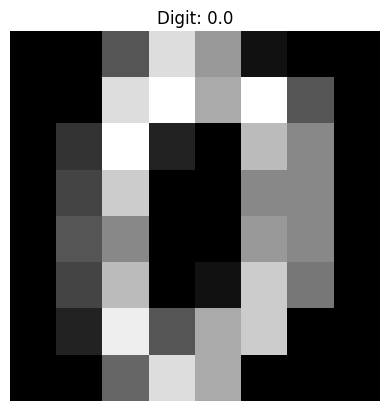

In [4]:
def plot_digit(sample: pd.Series):
  image = np.array(sample[:-1]).reshape(8, 8)

  plt.imshow(image, cmap='gray')  # 'gray' for grayscale images
  plt.title(f"Digit: {sample.digit}")
  plt.axis('off')  # Hide axis ticks and labels
  plt.show()

plot_digit(df.iloc[0])

In [5]:
data_train, data_test = np.split(df.sample(frac=1, random_state=42), [int(0.8*len(df))])

for i in range(10):
  print(f"{i}: {len(data_train[data_train.digit == i])}")

0: 134
1: 144
2: 143
3: 147
4: 140
5: 149
6: 150
7: 149
8: 135
9: 146


d:\Development\Github\dgr\env\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [33]:
def get_splits(dataframe):
  # features
  X = dataframe[dataframe.columns[:-1]].values

  # classes
  y = dataframe[dataframe.columns[-1]].values

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

train, X_train, y_train = get_splits(data_train)
test, X_test, y_test = get_splits(data_test)

In [34]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
X_train_scaled

array([[ 0.        , -0.32722497, -1.1093954 , ...,  1.22671301,
         0.72339676, -0.19043772],
       [ 0.        , -0.32722497,  1.22440991, ..., -0.96748708,
        -0.5103098 , -0.19043772],
       [ 0.        , -0.32722497,  0.58791755, ...,  0.21400528,
        -0.5103098 , -0.19043772],
       ...,
       [ 0.        , -0.32722497, -0.47290304, ...,  0.04522065,
        -0.5103098 , -0.19043772],
       [ 0.        , -0.32722497, -0.26073892, ..., -1.1362717 ,
        -0.5103098 , -0.19043772],
       [ 0.        ,  0.77142521,  0.80008167, ...,  0.3827899 ,
        -0.26356848, -0.19043772]], shape=(1437, 64))

# kNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [37]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn_model.predict(X_test_scaled)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.90      1.00      0.95        38
           2       1.00      0.97      0.99        34
           3       0.97      0.94      0.96        36
           4       1.00      0.95      0.97        41
           5       1.00      1.00      1.00        33
           6       1.00      0.97      0.98        31
           7       0.97      1.00      0.98        30
           8       0.95      0.92      0.94        39
           9       0.97      1.00      0.99        34

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360

